# Modelos TFG 

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler, OneHotEncoder



In [162]:
df_modelos = pd.read_csv("data/datosFinales/df_modelos.csv", sep = ";")
# drop columns from df_modelos which end with _1
df_modelos = df_modelos.loc[:, ~df_modelos.columns.str.contains('diferencia', case=False)]
categoricas = pd.read_csv("data/categoricas.csv", sep = ",").squeeze().tolist()
print(len(categoricas))
#pop from categoricas 'tipo_plastia' and 'via_asc_plastia'
categoricas.remove('tipo_plastia')
categoricas.remove('via_asc_plastia')
print(len(categoricas))

30
28


In [163]:
df_modelos.shape

(728, 141)

In [164]:
#fija el random state de todo el documento para todas las ejecuciones
np.random.seed(14)

In [165]:
df_modelos = df_modelos.loc[:, ~df_modelos.columns.str.endswith('_5')]
df_modelos = df_modelos.loc[:, ~df_modelos.columns.str.endswith('_4')]
df_modelos = df_modelos.loc[:, ~df_modelos.columns.str.endswith('_3')]
df_modelos = df_modelos.loc[:, ~df_modelos.columns.str.endswith('_2')]
df_modelos = df_modelos.loc[:, ~df_modelos.columns.str.endswith('_1')]
df_modelos = df_modelos.loc[:, ~df_modelos.columns.str.endswith('_0')]


df_modelos

,id_registro,sexo,edad,peso,talla,imc,neoadyuvancia,localizacion,tipo_histologico,ct,...,acondicionamienio,tipo_cirugia,abordaje,perdida_sang,anastomosis,tipo_anastomosis,piloro,icg,intervencin_complete,fuga
0,92-1,0.0,61.0,79.0,178.0,24.9,1.0,4.0,1.0,4.0,...,0.0,4.0,2.0,100.0,3.0,0.0,0.0,0.0,2.0,0
1,92-2,1.0,79.0,95.0,170.0,32.9,0.0,4.0,1.0,2.0,...,0.0,7.0,2.0,150.0,4.0,0.0,0.0,0.0,2.0,0
2,92-3,0.0,74.0,94.0,175.0,30.7,1.0,4.0,NaN,4.0,...,0.0,0.0,2.0,150.0,1.0,0.0,0.0,0.0,2.0,0
3,92-4,0.0,74.0,63.0,168.0,22.3,2.0,3.0,1.0,5.0,...,0.0,0.0,2.0,150.0,1.0,0.0,0.0,0.0,2.0,1
4,92-5,0.0,62.0,57.0,157.0,23.1,2.0,4.0,1.0,4.0,...,0.0,0.0,2.0,100.0,1.0,0.0,0.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,613-30,0.0,72.0,83.0,169.0,29.1,1.0,3.0,1.0,3.0,...,0.0,3.0,3.0,800.0,1.0,1.0,1.0,1.0,2.0,1
724,613-31,1.0,40.0,58.0,160.0,22.7,0.0,5.0,1.0,3.0,...,0.0,5.0,1.0,800.0,3.0,1.0,0.0,0.0,2.0,0
725,613-32,0.0,59.0,82.0,171.0,28.0,1.0,7.0,1.0,2.0,...,0.0,6.0,1.0,0.0,2.0,2.0,0.0,0.0,2.0,0
726,617-1,0.0,74.0,53.0,160.0,20.7,0.0,6.0,2.0,2.0,...,0.0,6.0,0.0,100.0,2.0,2.0,0.0,0.0,2.0,1


In [166]:
for col in df_modelos.columns:
    print(col)

id_registro
sexo
edad
peso
talla
imc
neoadyuvancia
localizacion
tipo_histologico
ct
cn
cm
ecog
asa
dm
hta
cardiopatia
nefropatia
alcohol
fumador
neumopatia
enf_vasc_cer
enf_art_peri
demencia
esteroides
datos_basales_complete
vol_diuresis_dia
hemoglobina
perioperatorio_complete
acondicionamienio
tipo_cirugia
abordaje
perdida_sang
anastomosis
tipo_anastomosis
piloro
icg
intervencin_complete
fuga


## Modelos

In [167]:
from sklearn.svm import SVC
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, 
                           confusion_matrix, 
                           accuracy_score,
                           roc_auc_score,
                           f1_score)
from sklearn.preprocessing import LabelEncoder





In [168]:
df_tmp = df_modelos.copy()[df_modelos['fuga'] != -1].drop('id_registro', axis=1, errors='ignore')

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# Ajustar y transformar las columnas categóricas
X_cat_encoded = encoder.fit_transform(df_tmp[categoricas])

# Crear DataFrame con los nuevos nombres de columnas
cat_encoded_df = pd.DataFrame(
    X_cat_encoded,
    columns=encoder.get_feature_names_out(categoricas),
    index=df_tmp.index  # mantener los índices originales
)

# Concatenar con el resto de columnas no categóricas
X_encoded = pd.concat([df_tmp.drop(columns=categoricas), cat_encoded_df], axis=1).drop(columns='fuga')
y = df_tmp['fuga']

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, stratify=y, random_state=14)

In [169]:
for col in X_encoded.columns:
    print(col)

edad
peso
talla
imc
vol_diuresis_dia
hemoglobina
perdida_sang
icg
intervencin_complete
sexo_0.0
sexo_1.0
sexo_nan
neoadyuvancia_0.0
neoadyuvancia_1.0
neoadyuvancia_2.0
neoadyuvancia_3.0
localizacion_1.0
localizacion_2.0
localizacion_3.0
localizacion_4.0
localizacion_5.0
localizacion_6.0
localizacion_7.0
tipo_histologico_0.0
tipo_histologico_1.0
tipo_histologico_2.0
tipo_histologico_3.0
tipo_histologico_4.0
tipo_histologico_nan
ct_0.0
ct_1.0
ct_2.0
ct_3.0
ct_4.0
ct_5.0
ct_6.0
ct_nan
cn_0.0
cn_1.0
cn_nan
cm_0.0
cm_1.0
cm_nan
ecog_0.0
ecog_1.0
ecog_2.0
ecog_3.0
ecog_4.0
ecog_nan
asa_0.0
asa_1.0
asa_2.0
asa_3.0
dm_0.0
dm_1.0
dm_nan
hta_0.0
hta_1.0
hta_nan
cardiopatia_0.0
cardiopatia_1.0
nefropatia_0.0
nefropatia_1.0
alcohol_0.0
alcohol_1.0
fumador_0.0
fumador_1.0
fumador_nan
neumopatia_0.0
neumopatia_1.0
neumopatia_nan
enf_vasc_cer_0.0
enf_vasc_cer_1.0
enf_art_peri_0.0
enf_art_peri_1.0
enf_art_peri_nan
demencia_0.0
demencia_1.0
demencia_nan
esteroides_0.0
esteroides_1.0
esteroides_nan
dato

In [ ]:
# modelo_hgb = HistGradientBoostingClassifier(
#     max_iter=1000,           # Número de árboles (iteraciones)
#     learning_rate=0.2,      # Tasa de aprendizaje
#     max_depth=6,            # Profundidad máxima de los árboles
#     categorical_features=categoricas,  # Especificar columnas categóricas
#     early_stopping=True,    # Parada temprana si no mejora
#     scoring='roc_auc'      # Métrica para early stopping
# )

#gridsearch l2regularization, learning_rate, class_weight (balance) 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import LeaveOneOut


param_grid = {
    'max_iter': [100],
    'learning_rate': [0.5, 0.8, 0.9, 1],
    'max_depth': [1, 2],
    'min_samples_leaf': [1, 2, 3, 4],
    'early_stopping': [True],
    'l2_regularization': [0.6, 0.7, 0.8, 1],
    'class_weight': ['balanced', None]
}
modelo_hgb = HistGradientBoostingClassifier(random_state=14)
# Use RandomizedSearchCV for a more efficient search
grid_search = RandomizedSearchCV(modelo_hgb, param_grid, cv=LeaveOneOut(), n_jobs=-1)
grid_search.fit(X_train, y_train)


In [171]:
#best hiperparameters
print("Mejores hiperparámetros:")
print("max_iter: 1000")
print("learning_rate: ", grid_search.best_params_['learning_rate'])
print("max_depth: ", grid_search.best_params_['max_depth'])
print("min_samples_leaf: ", grid_search.best_params_['min_samples_leaf'])
print("early_stopping: ", grid_search.best_params_['early_stopping'])
print("l2_regularization: ", grid_search.best_params_['l2_regularization'])
print("class_weight: ", grid_search.best_params_['class_weight'])
print("Mejor puntuación:")
print(grid_search.best_score_)


Mejores hiperparámetros:
max_iter: 1000
learning_rate:  0.5
max_depth:  1
min_samples_leaf:  2
early_stopping:  True
l2_regularization:  1
class_weight:  None
Mejor puntuación:
0.8059071729957806


In [172]:
#create a model with the best hyperparameters
modelo_hgb = HistGradientBoostingClassifier(
    max_iter=100,           # Número de árboles (iteraciones)
    learning_rate=grid_search.best_params_['learning_rate'],      # Tasa de aprendizaje
    max_depth=1,            # Profundidad máxima de los árboles
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    early_stopping=True,    # Parada temprana si no mejora
    scoring='roc_auc',      # Métrica para early stopping
    l2_regularization=0.8,  # Regularización L2
    class_weight='balanced', # Balancear clases
    random_state=14
)

modelo_hgb.fit(X_train, y_train)

y_pred_train = modelo_hgb.predict(X_train)
y_proba_train = modelo_hgb.predict_proba(X_train)[:, 1] 

y_pred = modelo_hgb.predict(X_test)
y_proba = modelo_hgb.predict_proba(X_test)[:, 1] 

print("Matriz de confusión con train")
print(confusion_matrix(y_train, y_pred_train))
print("Reporte de clasificación:")
print(classification_report(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("AUC:", roc_auc_score(y_train, y_proba_train))



print("\n\nMatriz de confusión con test")
print(confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))

Matriz de confusión con train
[[243 139]
 [ 17  75]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.93      0.64      0.76       382
           1       0.35      0.82      0.49        92

    accuracy                           0.67       474
   macro avg       0.64      0.73      0.62       474
weighted avg       0.82      0.67      0.71       474

Accuracy: 0.6708860759493671
AUC: 0.7766332802185294


Matriz de confusión con test
[[94 71]
 [11 28]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.90      0.57      0.70       165
           1       0.28      0.72      0.41        39

    accuracy                           0.60       204
   macro avg       0.59      0.64      0.55       204
weighted avg       0.78      0.60      0.64       204

Accuracy: 0.5980392156862745
AUC: 0.6947163947163946


In [173]:
modelo_hgb

HistGradientBoostingClassifier(class_weight='balanced', early_stopping=True,
                               l2_regularization=0.8, learning_rate=0.5,
                               max_depth=1, min_samples_leaf=2, random_state=14,
                               scoring='roc_auc')

In [174]:
# grid search
# modelo con selection 
# busqueda del modelo, punto vista modelo y medico



In [175]:
import dalex as dx

exp = dx.Explainer(modelo_hgb, X_encoded, y)
vi = exp.model_parts()
vi.plot(max_vars=10)
#select the 10 most important variables from the explainer
imps = vi.result['variable'][-10:-1].tolist()

Preparation of a new explainer is initiated

  -> data              : 678 rows 116 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 678 values
  -> model_class       : sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x147e04ca0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0505, mean = 0.452, max = 0.808
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.807, mean = -0.258, max = 0.854
  -> model_info        : package sklearn

A new explainer has been created!


In [176]:
for im in imps:
    if im not in X_encoded.columns:
        imps.remove(im)

imps


['neumopatia_nan',
 'localizacion_4.0',
 'peso',
 'asa_3.0',
 'imc',
 'perdida_sang',
 'talla',
 'cardiopatia_0.0',
 'localizacion_7.0']

In [177]:
X_encoded['id_registro'] = df_modelos['id_registro']

In [178]:
X_encoded

,edad,peso,talla,imc,vol_diuresis_dia,hemoglobina,perdida_sang,icg,intervencin_complete,sexo_0.0,...,anastomosis_nan,tipo_anastomosis_0.0,tipo_anastomosis_1.0,tipo_anastomosis_2.0,tipo_anastomosis_3.0,tipo_anastomosis_nan,piloro_0.0,piloro_1.0,piloro_nan,id_registro
0,61.0,79.0,178.0,24.9,1200.0,14.0,100.0,0.0,2.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,92-1
1,79.0,95.0,170.0,32.9,1065.0,12.1,150.0,0.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,92-2
2,74.0,94.0,175.0,30.7,1320.0,12.3,150.0,0.0,2.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,92-3
3,74.0,63.0,168.0,22.3,1369.0,11.1,150.0,0.0,2.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,92-4
4,62.0,57.0,157.0,23.1,2100.0,9.0,100.0,0.0,2.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,92-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,63.0,85.0,175.0,27.8,2100.0,14.8,400.0,0.0,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,613-29
723,72.0,83.0,169.0,29.1,2100.0,13.0,800.0,1.0,2.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,613-30
724,40.0,58.0,160.0,22.7,2500.0,12.8,800.0,0.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,613-31
725,59.0,82.0,171.0,28.0,2000.0,14.8,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,613-32


In [180]:
# Filter the `imps` list to include only columns that exist in `df_modelos`
df_imps = X_encoded[imps]
df_imps['id_registro'] = df_modelos['id_registro']

#save as a dataframe the csv: data/datosFinales/df_dalex.csv
df_dalex = pd.read_csv("data/datosFinales/df_dalex.csv", sep = ";")
df_dalex['id_registro'] = df_modelos['id_registro']


In [194]:
overlap_cols = set(df_imps.columns) & set(df_dalex.columns) - {'id_registro'}
df_imps_filtered = df_imps.drop(columns=overlap_cols)

merged = pd.merge(df_imps_filtered, df_dalex, on='id_registro', how='left')
merged.to_csv("data/datosFinales/df_dalex.csv", sep=";", index=False)

In [182]:
#quita de categoricas las variables que no estan en df_sel
categoricas2 = [col for col in categoricas if col in df_imps.columns]

In [195]:
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# Ajustar y transformar las columnas categóricas
X_cat_encoded = encoder.fit_transform(df_tmp[categoricas2])

# Crear DataFrame con los nuevos nombres de columnas
cat_encoded_df = pd.DataFrame(
    X_cat_encoded,
    columns=encoder.get_feature_names_out(categoricas2),
    index=df_tmp.index  # mantener los índices originales
)

# Concatenar con el resto de columnas no categóricas
X_encoded = pd.concat([df_tmp.drop(columns=categoricas2), cat_encoded_df], axis=1).drop(columns='fuga')

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, stratify=y, random_state=14)

In [196]:
X_encoded

,sexo,edad,peso,talla,imc,neoadyuvancia,localizacion,tipo_histologico,ct,cn,...,perioperatorio_complete,acondicionamienio,tipo_cirugia,abordaje,perdida_sang,anastomosis,tipo_anastomosis,piloro,icg,intervencin_complete
0,0.0,61.0,79.0,178.0,24.9,1.0,4.0,1.0,4.0,0.0,...,2.0,0.0,4.0,2.0,100.0,3.0,0.0,0.0,0.0,2.0
1,1.0,79.0,95.0,170.0,32.9,0.0,4.0,1.0,2.0,0.0,...,2.0,0.0,7.0,2.0,150.0,4.0,0.0,0.0,0.0,2.0
2,0.0,74.0,94.0,175.0,30.7,1.0,4.0,NaN,4.0,1.0,...,2.0,0.0,0.0,2.0,150.0,1.0,0.0,0.0,0.0,2.0
3,0.0,74.0,63.0,168.0,22.3,2.0,3.0,1.0,5.0,1.0,...,2.0,0.0,0.0,2.0,150.0,1.0,0.0,0.0,0.0,2.0
4,0.0,62.0,57.0,157.0,23.1,2.0,4.0,1.0,4.0,1.0,...,2.0,0.0,0.0,2.0,100.0,1.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,1.0,63.0,85.0,175.0,27.8,0.0,7.0,1.0,2.0,0.0,...,2.0,0.0,6.0,3.0,400.0,3.0,2.0,0.0,0.0,2.0
723,0.0,72.0,83.0,169.0,29.1,1.0,3.0,1.0,3.0,0.0,...,2.0,0.0,3.0,3.0,800.0,1.0,1.0,1.0,1.0,2.0
724,1.0,40.0,58.0,160.0,22.7,0.0,5.0,1.0,3.0,1.0,...,2.0,0.0,5.0,1.0,800.0,3.0,1.0,0.0,0.0,2.0
725,0.0,59.0,82.0,171.0,28.0,1.0,7.0,1.0,2.0,0.0,...,2.0,0.0,6.0,1.0,0.0,2.0,2.0,0.0,0.0,2.0


In [197]:

#create a model with the best hyperparameters
modelo_hgb = HistGradientBoostingClassifier(
    max_iter=100,           # Número de árboles (iteraciones)
    learning_rate=grid_search.best_params_['learning_rate'],      # Tasa de aprendizaje
    max_depth=1,            # Profundidad máxima de los árboles
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    categorical_features=categoricas2,  # Especificar columnas categóricas
    early_stopping=True,    # Parada temprana si no mejora
    scoring='roc_auc',      # Métrica para early stopping
    l2_regularization=0.8,  # Regularización L2
    class_weight='balanced', # Balancear clases
    random_state=14
)
modelo_hgb.fit(X_train, y_train)
y_pred_train = modelo_hgb.predict(X_train)
y_proba_train = modelo_hgb.predict_proba(X_train)[:, 1]
y_pred = modelo_hgb.predict(X_test)
y_proba = modelo_hgb.predict_proba(X_test)[:, 1]

print("Matriz de confusión con train")
print(confusion_matrix(y_train, y_pred_train))
print("Reporte de clasificación:")
print(classification_report(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("AUC:", roc_auc_score(y_train, y_proba_train))
print("\n\nMatriz de confusión con test")
print(confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))



Matriz de confusión con train
[[250 132]
 [ 18  74]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.93      0.65      0.77       382
           1       0.36      0.80      0.50        92

    accuracy                           0.68       474
   macro avg       0.65      0.73      0.63       474
weighted avg       0.82      0.68      0.72       474

Accuracy: 0.6835443037974683
AUC: 0.7973053721830184


Matriz de confusión con test
[[100  65]
 [ 12  27]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.61      0.72       165
           1       0.29      0.69      0.41        39

    accuracy                           0.62       204
   macro avg       0.59      0.65      0.57       204
weighted avg       0.78      0.62      0.66       204

Accuracy: 0.6225490196078431
AUC: 0.7164724164724164


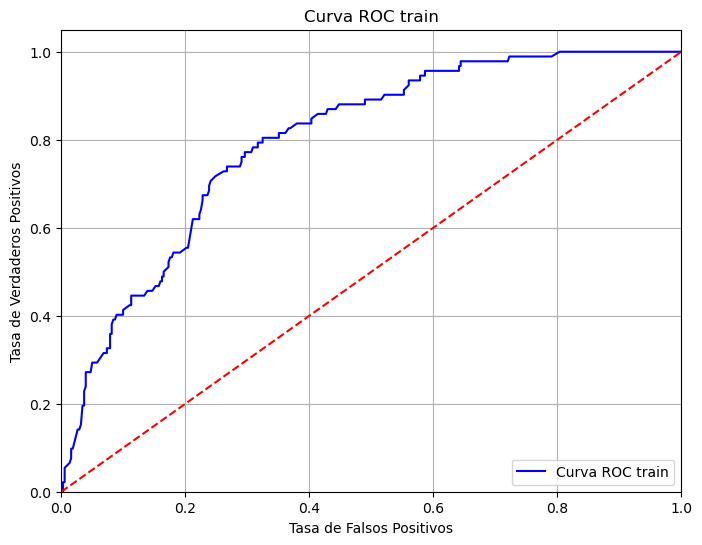

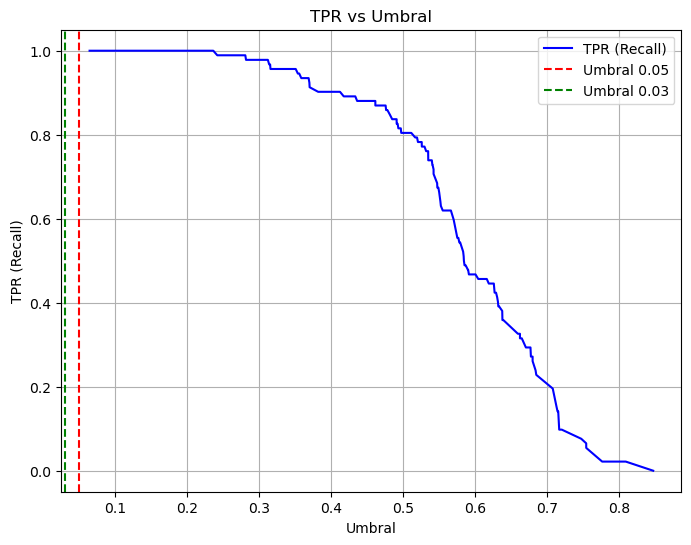

In [189]:
#show the roc curve for the model "modelo_hgb"
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_proba_train, pos_label=1)
#graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC train', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC train')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# dibuja el fpr vs el umbral
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='TPR (Recall)', color='blue')
plt.xlabel('Umbral')
plt.ylabel('TPR (Recall)')
plt.title('TPR vs Umbral')
plt.axvline(x=0.05, color='red', linestyle='--', label='Umbral 0.05')
plt.axvline(x=0.03, color='green', linestyle='--', label='Umbral 0.03')
plt.legend()
plt.grid()
plt.show()



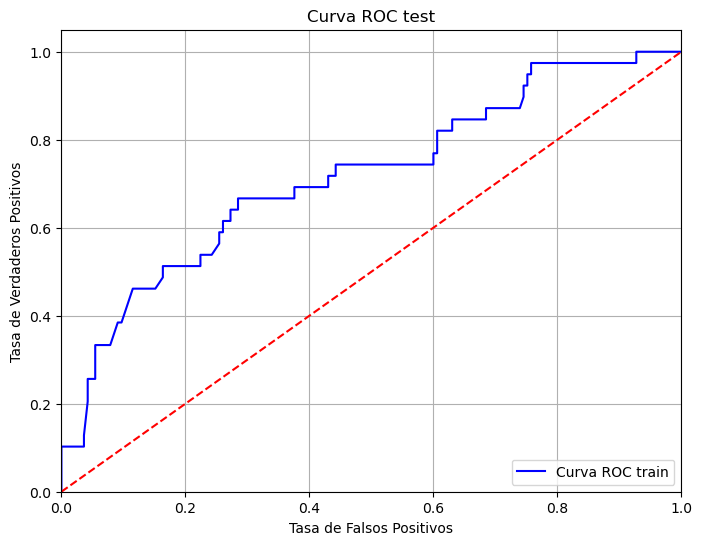

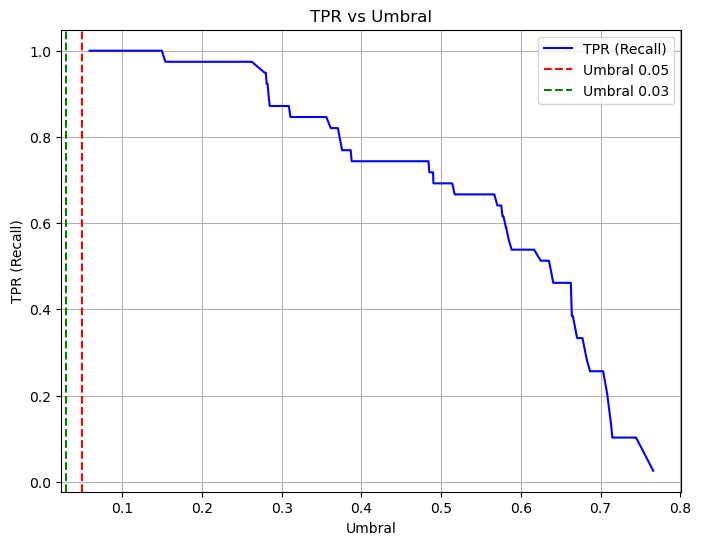

In [190]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba, pos_label=1)
#graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Curva ROC train', color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC test')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# dibuja el fpr vs el umbral
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='TPR (Recall)', color='blue')
plt.xlabel('Umbral')
plt.ylabel('TPR (Recall)')
plt.title('TPR vs Umbral')
plt.axvline(x=0.05, color='red', linestyle='--', label='Umbral 0.05')
plt.axvline(x=0.03, color='green', linestyle='--', label='Umbral 0.03')
plt.legend()
plt.grid()
plt.show()



Umbral óptimo ROC: 0.5667
Umbral óptimo según F1-score: 0.5412


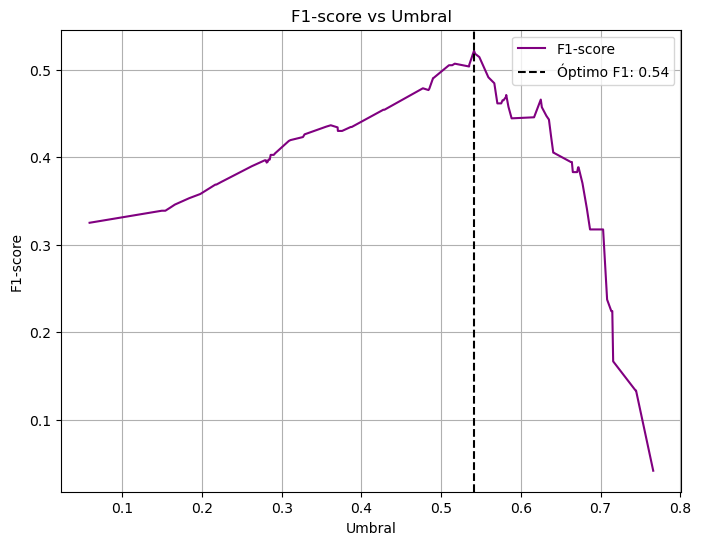

In [191]:
# Criterio: minimizar distancia al punto perfecto (0,1)
distancias = np.sqrt((1 - tpr)**2 + fpr**2)
umbral_optimo = thresholds[np.argmin(distancias)]
print(f"Umbral óptimo ROC: {umbral_optimo:.4f}")

f1_scores = [f1_score(y_train, y_proba_train > thr) for thr in thresholds]
umbral_f1 = thresholds[np.argmax(f1_scores)]
print(f"Umbral óptimo según F1-score: {umbral_f1:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, label='F1-score', color='purple')
plt.axvline(x=umbral_f1, color='black', linestyle='--', label=f'Óptimo F1: {umbral_f1:.2f}')
plt.xlabel('Umbral')
plt.ylabel('F1-score')
plt.title('F1-score vs Umbral')
plt.legend()
plt.grid()
plt.show()


In [192]:
confusion_matrix(y_train, y_proba_train>0.1)

array([[  8, 374],
       [  0,  92]])

In [193]:
confusion_matrix(y_test, y_proba>umbral_optimo)

array([[118,  47],
       [ 14,  25]])